<a href="https://colab.research.google.com/github/AhmadRafif22/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDENTITAS MAHASISWA

Nama : Ahmad Rafif Alaudin

Kelas : TI 3G

NIM : 2041720230

Absen : 02

# Jobsheet Pertemuan 9 - Morfologi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [19]:
# Import image
morphology_img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/morphology.png',0)

In [40]:
# membuat fungsi dilasi

def dilasi(image):
    # inisialisasi kernel
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

    # inisialisasi citra hasil dilasi dengan nilai nol
    dilasi = np.zeros_like(image)

    # ukuran citra dan kernel
    m, n = image.shape
    k, l = kernel.shape
    pad_h, pad_w = k//2, l//2

    # melakukan operasi dilasi
    for i in range(pad_h, m-pad_h):
        for j in range(pad_w, n-pad_w):
            temp = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            temp = temp * kernel
            dilasi[i, j] = np.max(temp)

    return dilasi

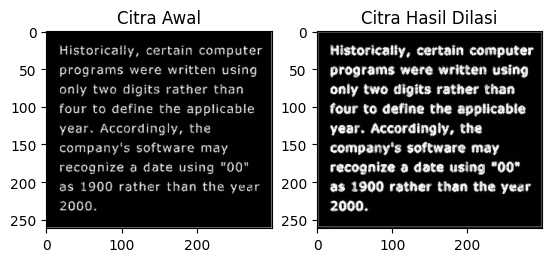

In [20]:
# melakukan dilasi
Image_dilasi = dilasi(morphology_img)

# menampilkan citra asli dan hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(morphology_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(1, 2, 2), plt.imshow(Image_dilasi, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

### 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya) 


In [22]:
# Import image
morphology_img4 = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/morphology.png')

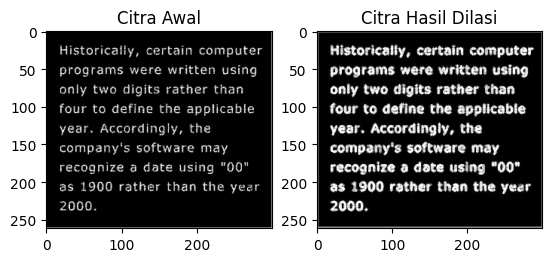

In [23]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
Image_dilasi = cv2.dilate(morphology_img4, kernel, iterations=1)

plt.subplot(121), plt.imshow(morphology_img4), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(Image_dilasi), plt.title('Citra Hasil Dilasi')

plt.show()

### 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

In [44]:
# Import Image
j_img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/j.png', 0)

In [45]:
def erosi(image):
  # Inisialisasi ukuran kernel dan citra hasil erosi
  kernel_size = 3
  kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
  erosi = np.zeros_like(image)

  # Konstanta padding
  constant = (kernel_size - 1) // 2

  # Operasi erosi
  for i in range(constant, image.shape[0] - constant):
      for j in range(constant, image.shape[1] - constant):
          temp = image[i - constant:i + constant + 1, j - constant:j + constant + 1]
          product = temp * kernel
          erosi[i, j] = np.min(product)
  return erosi

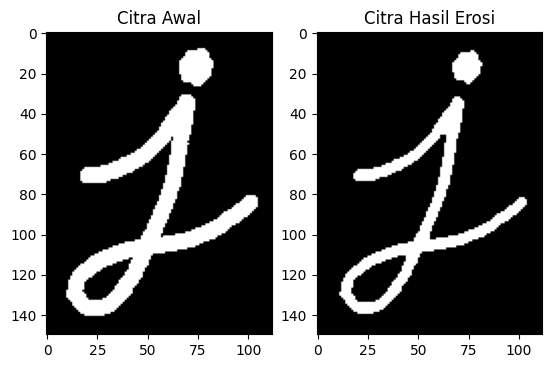

In [46]:
# melakukan erosi
Image_erosi = erosi(j_img)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(j_img, cmap='gray')
plt.title('Citra Awal')

# Menampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(Image_erosi, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()

### 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 

In [29]:
# Import Image
j_img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/j.png')

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

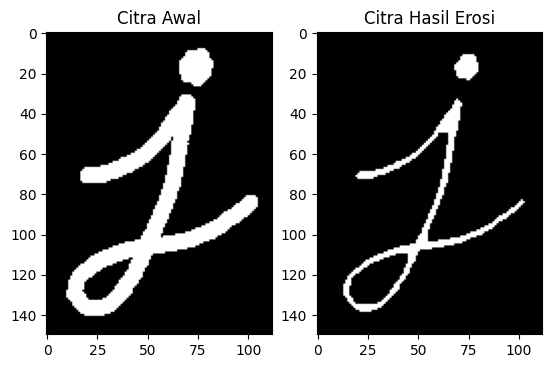

In [30]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(j_img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(j_img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

### 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png) 

> tanpa library

In [47]:
# Import Image
finger_img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/fingerprint.png',0)

(Text(0.5, 1.0, 'Citra Hasil Opening'), ([], []), ([], []))

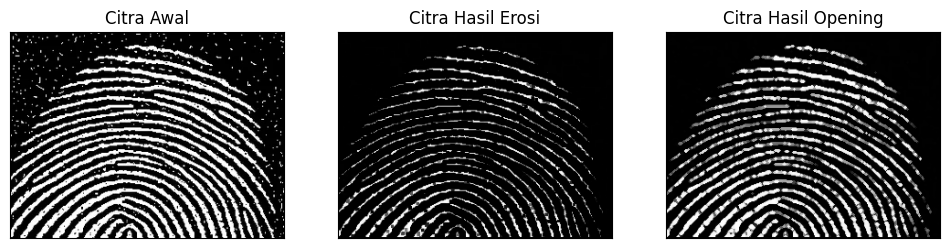

In [48]:
# melakukan erosi
Image_erosi = erosi(finger_img)

# melakukan dilasi
Image_opening = dilasi(Image_erosi)

plt.figure(figsize=(12,8))

plt.subplot(231), plt.imshow(finger_img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(Image_erosi, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(Image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

> dengan library

(Text(0.5, 1.0, 'Citra Hasil Opening'), ([], []), ([], []))

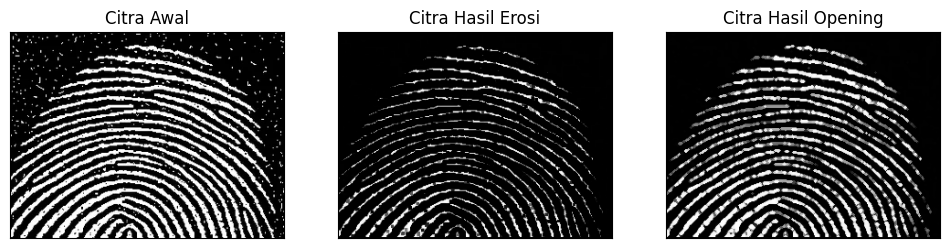

In [49]:
kernel_erosion = np.ones((3,3), np.uint8)
erosion = cv2.erode(finger_img, kernel_erosion, iterations = 1)

kernel_dilasi = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
Image_dilasi = cv2.dilate(erosion, kernel_dilasi, iterations=1)

plt.figure(figsize=(12,8))

plt.subplot(231), plt.imshow(finger_img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(Image_erosi, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(Image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

### 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

> tanpa library

(Text(0.5, 1.0, 'Citra Hasil Opening'), ([], []), ([], []))

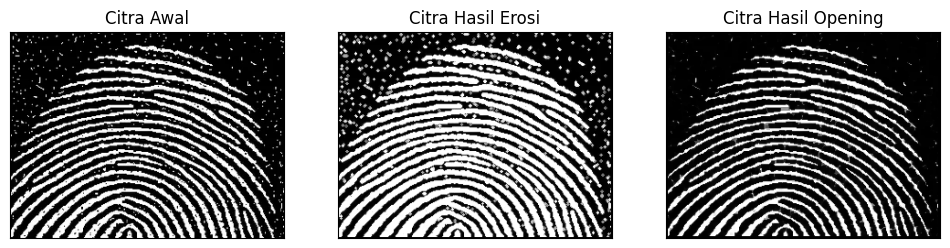

In [52]:
# melakukan dilasi
Image_dilation = dilasi(finger_img)

# melakukan erosi
Image_closing = erosi(Image_dilation)

plt.figure(figsize=(12,8))

plt.subplot(231), plt.imshow(finger_img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(Image_dilation, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(Image_closing, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

> dengan library

(Text(0.5, 1.0, 'Citra Hasil Opening'), ([], []), ([], []))

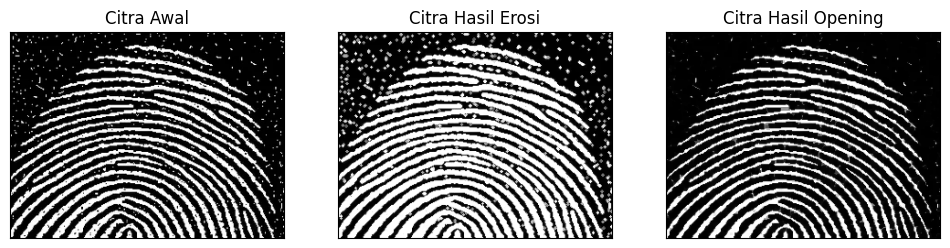

In [51]:
kernel_dilasi = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
Image_dilasi = cv2.dilate(finger_img, kernel_dilasi, iterations=1)

kernel_erosion = np.ones((3,3), np.uint8)
Image_opening = cv2.erode(Image_dilasi, kernel_erosion, iterations = 1)

plt.figure(figsize=(12,8))

plt.subplot(231), plt.imshow(finger_img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(Image_dilasi, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(Image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])